In [2]:
import numpy as np
import matplotlib.pyplot as plt

import jax
from functools import partial
import jax.numpy as jnp

plt.rcParams['figure.figsize'] = [12, 8] # PDF 

import time
from tqdm import tqdm

from Dynamics import logistic_map, henon_map
from Kernels import ext_kernel
from Losses import rho_comp

from Optimizer import main_flow, main_sos
from DataManager import get_curr_data, sample_points
from utils import get_predict_func, gen_traj, predict_series, get_pred_funcs, set_seed, hausdorff_distance, save_res, load_res
from notebook_utils import do_test, get_thetas, print_stats, get_latex_test, get_latex_train, get_latex_rho

jax.config.update("jax_enable_x64", True)


%load_ext autoreload
%autoreload 2

In [3]:

a = 1.4
b = 0.3
x = -0.75
y = -0.3

x_vec_0 = [x, y]



traj_train = jnp.array(gen_traj(henon_map(a, b), x_vec_0, 1000))

X_train = traj_train[:-1]
Y_train = traj_train[1:]

In [ ]:
flow_para = {
    "lr": 0.1,
    "num_steps": 200
}

sos_para = {
    "N_samples": 200,
    "N_steps": 100,
    "lmbda": 1e-5,
    "eps": 1e-6,
    "sig": 1e-1
}

start_seed = 0

num_theta = 10
thetas_flow, losses_flow, thetas_sos, losses_sos = get_thetas(X_train, Y_train, start_seed, flow_para, sos_para, num_theta)


100%|██████████| 200/200 [01:18<00:00,  2.54it/s]


flow min 0.010047203571261876


100%|██████████| 100/100 [00:13<00:00,  7.39it/s]


found min 0.004220483296829669
sample min 0.004215350512243421


100%|██████████| 200/200 [01:19<00:00,  2.50it/s]


flow min 0.006350093323999051


100%|██████████| 100/100 [00:12<00:00,  8.16it/s]


found min 0.0006014254325416024
sample min 0.0006027670766830528


100%|██████████| 200/200 [01:09<00:00,  2.90it/s]


flow min 0.011431727565460625


100%|██████████| 100/100 [00:10<00:00,  9.14it/s]


found min 0.0041978117399656956
sample min 0.004136673960208781


100%|██████████| 200/200 [00:58<00:00,  3.39it/s]


flow min 0.005488175591522038


100%|██████████| 100/100 [00:09<00:00, 11.11it/s]


found min 0.0010953698063559392
sample min 0.0011188081654183168


100%|██████████| 200/200 [00:57<00:00,  3.46it/s]


flow min 0.009406390165978551


100%|██████████| 100/100 [00:08<00:00, 12.03it/s]


found min 0.0033129013297180654
sample min 0.0033177344262182995


100%|██████████| 200/200 [00:55<00:00,  3.61it/s]


flow min 0.006574277684185614


100%|██████████| 100/100 [00:08<00:00, 12.25it/s]


found min 0.0015665462018834564
sample min 0.0016439428498242759


 36%|███▌      | 71/200 [00:19<00:34,  3.76it/s]

In [ ]:
theta_res = {
    "thetas_flow": thetas_flow,
    "losses_flow": losses_flow,
    "thetas_sos": thetas_sos,
    "losses_sos": losses_sos
}

save_res("Henon", theta_res)

# Testing

In [33]:
a = 1.4
b = 0.3

x_vec_0_test = jnp.array([0.5, 0.])

traj_test = jnp.array(gen_traj(henon_map(a, b), x_vec_0_test, 1000))

In [ ]:
res = load_res("Henon")

In [ ]:
HD_losses_flow, deviate_steps_flow, mse_losses_flow = do_test(res['thetas_flow'], x_vec_0_test, traj_test, X_train, Y_train)
HD_losses_sos, deviate_steps_sos, mse_losses_sos = do_test(res['thetas_sos'], x_vec_0_test, traj_test, X_train, Y_train)


HD_losses_flow_train, deviate_steps_flow_train, mse_losses_flow_train = do_test(res['thetas_flow'], x_vec_0, traj_train, X_train, Y_train)
HD_losses_sos_train, deviate_steps_sos_train, mse_losses_sos_train = do_test(res['thetas_sos'], x_vec_0, traj_train, X_train, Y_train)


In [ ]:
test_flow_res = {
    "HD_losses_flow": HD_losses_flow,
    "deviate_steps_flow": deviate_steps_flow,
    "mse_losses_flow": mse_losses_flow
}

test_sos_res = {
    "HD_losses_sos": HD_losses_sos,
    "deviate_steps_sos": deviate_steps_sos,
    "mse_losses_sos": mse_losses_sos
}

save_res("Henon", test_flow_res)
save_res("Henon", test_sos_res)

In [ ]:
test_train_flow_res = {
    "HD_losses_flow_train": HD_losses_flow_train,
    "deviate_steps_flow_train": deviate_steps_flow_train,
    "mse_losses_flow_train": mse_losses_flow_train
}

test_train_sos_res = {
    "HD_losses_sos_train": HD_losses_sos_train,
    "deviate_steps_sos_train": deviate_steps_sos_train,
    "mse_losses_sos_train": mse_losses_sos_train
}

save_res("Henon", test_train_flow_res)
save_res("Henon", test_train_sos_res)

In [4]:
res = load_res("Henon")

In [5]:
get_latex_test(res)

MSE & $8.68 \ [6.40, 11.98] \times 10^{-5}$ & $3.01 \ [2.90, 3.21] \times 10^{-4}$ \\ HD & $9.64 \ [9.21, 9.70] \times 10^{-2}$ & $9.69 \ [9.63, 9.70] \times 10^{-2}$ \\ Deviation (0.1) & $9.00 \ [8.25, 9.00]$ & $4.00$ \\ Deviation (0.25) & $1.00 \ [0.93, 1.00] \times 10^{1}$ & $4.00 \ [4.00, 6.00]$ \\ 


In [9]:
get_latex_test(res)

MSE & $8.68 \ [6.40, 11.98] \times 10^{-5}$ & $1.03 \ [0.45, 2.58] \times 10^{-3}$ \\ HD & $9.64 \ [9.21, 9.70] \times 10^{-2}$ & $9.68 \ [9.56, 9.74] \times 10^{-2}$ \\ Deviation (0.1) & $9.00 \ [8.25, 9.00]$ & $6.00 \ [2.50, 8.00]$ \\ Deviation (0.25) & $1.00 \ [0.93, 1.00] \times 10^{1}$ & $7.00 \ [4.50, 9.00]$ \\ 


In [10]:
get_latex_train(res)

MSE & $2.43 \ [1.55, 4.14] \times 10^{-13}$ & $3.03 \ [1.85, 9.16] \times 10^{-14}$ \\ HD & $8.51 \ [8.36, 8.75] \times 10^{-2}$ & $8.64 \ [8.46, 9.09] \times 10^{-2}$ \\ Deviation (0.1) & $7.20 \ [6.50, 7.20] \times 10^{1}$ & $6.55 \ [5.75, 7.43] \times 10^{1}$ \\ Deviation (0.25) & $7.20 \ [6.60, 7.40] \times 10^{1}$ & $7.05 \ [6.25, 7.58] \times 10^{1}$ \\ 


In [6]:
get_latex_rho(res)

Rho & $6.08 \ [2.35, 21.53] \times 10^{-3}$ & $7.94 \ [6.70, 10.96] \times 10^{-3}$ \\ 


In [11]:
get_latex_rho(res)

Rho & $6.08 \ [2.35, 21.53] \times 10^{-3}$ & $1.84 \ [0.62, 2.60] \times 10^{-2}$ \\ 


# Visualizations 

In [25]:
idx = 0

dyn_type = "Henon"


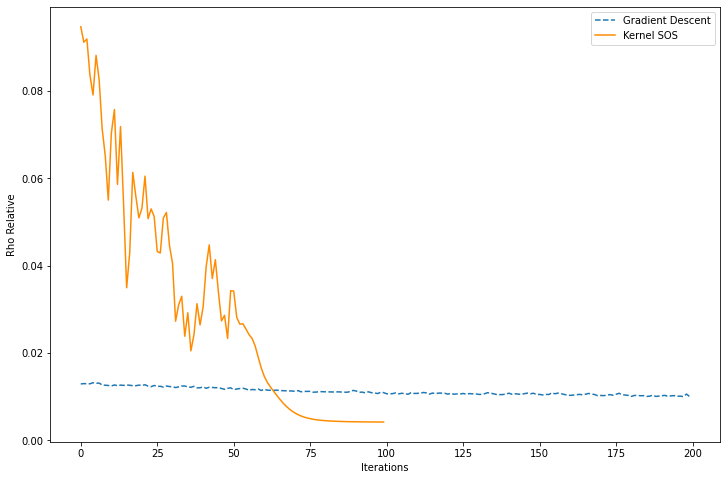

In [63]:
import tikzplotlib

dim_idx = 0

plt.plot(res["losses_flow"][idx, dim_idx, :], label="Gradient Descent", linestyle="--")
plt.plot(res["losses_sos"][idx, dim_idx, :], label="Kernel SOS", c="darkorange")

plt.xlabel("Iterations")
plt.ylabel("Rho Relative")

plt.legend()

tikzplotlib.save(f"Figures/{dyn_type}_rho_{dim_idx}_idx.tex")

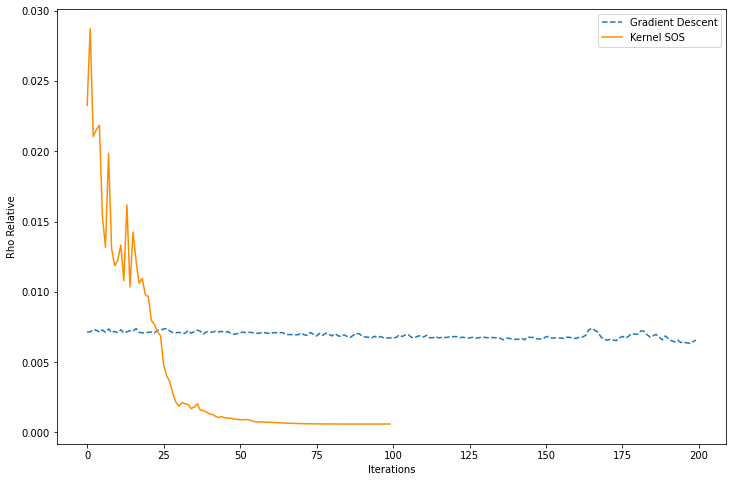

In [64]:
import tikzplotlib

dim_idx = 1

plt.plot(res["losses_flow"][idx, dim_idx, :], label="Gradient Descent", linestyle="--")
plt.plot(res["losses_sos"][idx, dim_idx, :], label="Kernel SOS", c="darkorange")

plt.xlabel("Iterations")
plt.ylabel("Rho Relative")

plt.legend()

tikzplotlib.save(f"Figures/{dyn_type}_rho_{dim_idx}_idx.tex")

In [34]:
pred_funcs_flow = get_pred_funcs(res['thetas_flow'][idx], ext_kernel, X_train, Y_train)
pred_funcs_sos = get_pred_funcs(res['thetas_sos'][idx], ext_kernel, X_train, Y_train)

traj_preds_flow = predict_series(pred_funcs_flow, jnp.array(x_vec_0_test), len(X_train))
traj_preds_sos = predict_series(pred_funcs_sos, jnp.array(x_vec_0_test), len(X_train))

100%|██████████| 1000/1000 [00:34<00:00, 28.67it/s]


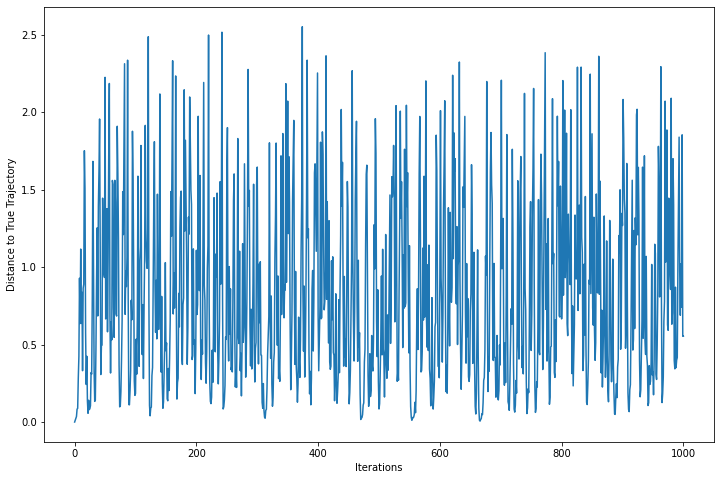

In [67]:

opt_type = "flow"

plt.plot(np.linalg.norm((traj_test - traj_preds_flow), axis=1))

plt.xlabel("Iterations")
plt.ylabel("Distance to True Trajectory")

tikzplotlib.save(f"Figures/{dyn_type}_errTraj_{opt_type}.tex")

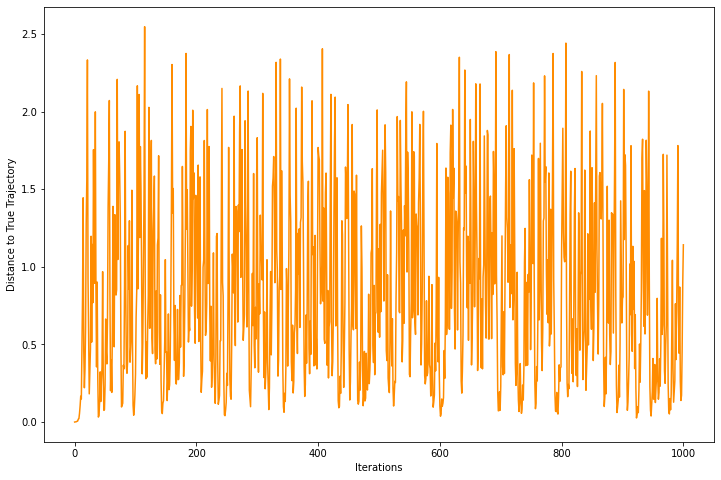

In [68]:

opt_type = "sos"

plt.plot(np.linalg.norm((traj_test - traj_preds_sos), axis=1), c="darkorange")

plt.xlabel("Iterations")
plt.ylabel("Distance to True Trajectory")

tikzplotlib.save(f"Figures/{dyn_type}_errTraj_{opt_type}.tex")

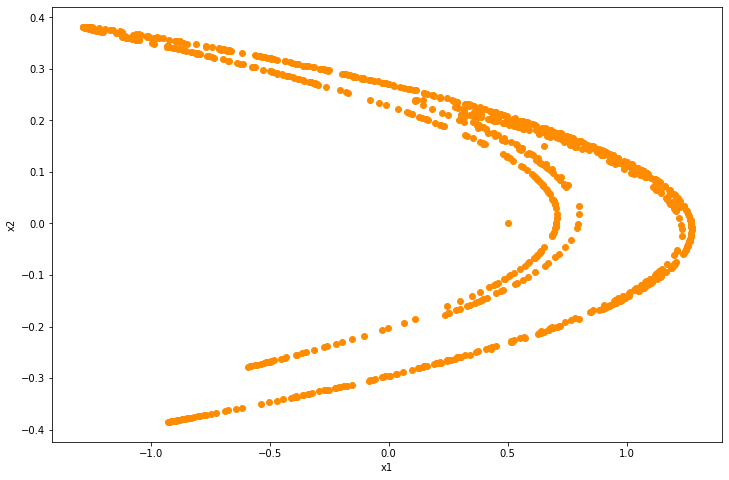

In [66]:


opt_type = "sos"

plt.scatter(traj_preds_sos[:, 0], traj_preds_sos[:, 1], c="darkorange")

plt.xlabel("x1")
plt.ylabel("x2")

tikzplotlib.save(f"Figures/{dyn_type}_Traj_{opt_type}.tex")

plt.show()

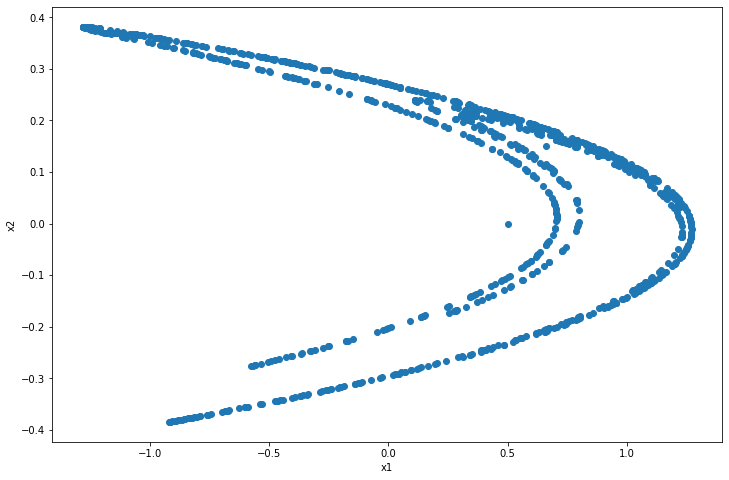

In [60]:


opt_type = "flow"

plt.scatter(traj_preds_flow[:, 0], traj_preds_flow[:, 1])

plt.xlabel("x1")
plt.ylabel("x2")

tikzplotlib.save(f"Figures/{dyn_type}_Traj_{opt_type}.tex")

plt.show()

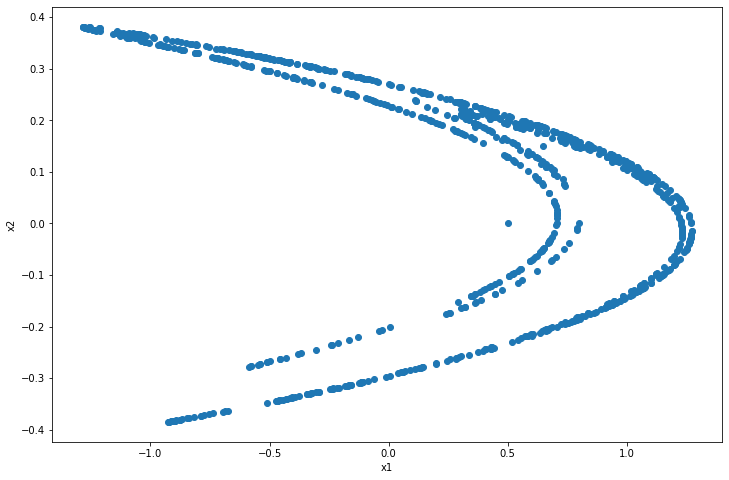

In [62]:


opt_type = "true"

plt.scatter(traj_test[:, 0], traj_test[:, 1])

plt.xlabel("x1")
plt.ylabel("x2")

tikzplotlib.save(f"Figures/{dyn_type}_Traj_{opt_type}.tex")

plt.show()

### Y.idx 0

In [28]:
y_idx = 0

lr = 0.5
num_steps = 200

X_batch, y_batch, X_sub, y_sub = get_curr_data(X_train, Y_train, 1000, 500)

seed = 0
losses_flow_0, theta_star_flow_0 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, lr, num_steps)


N=100 
N_samples=200
lmbda=1e-5
eps=1e-6
sig=1e-1
losses_sos_0, theta_star_sos_0 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N_samples, N, lmbda, eps, sig)


100%|██████████| 200/200 [00:59<00:00,  3.36it/s]


flow min 0.006942012955724053


100%|██████████| 100/100 [00:13<00:00,  7.64it/s]


found min 0.0047553250009436665
sample min 0.005127707141447724


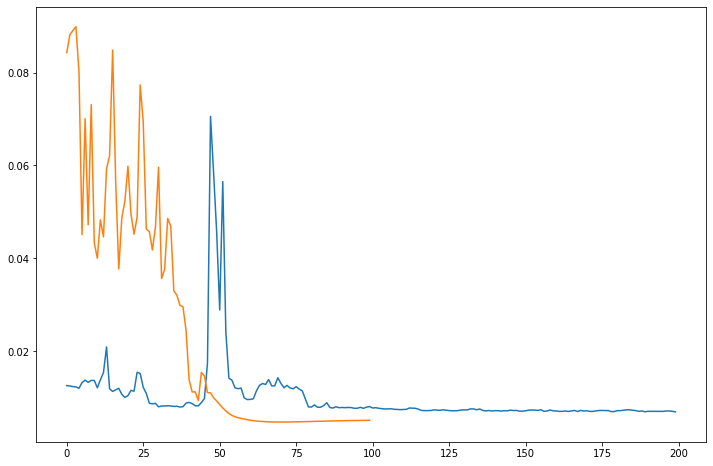

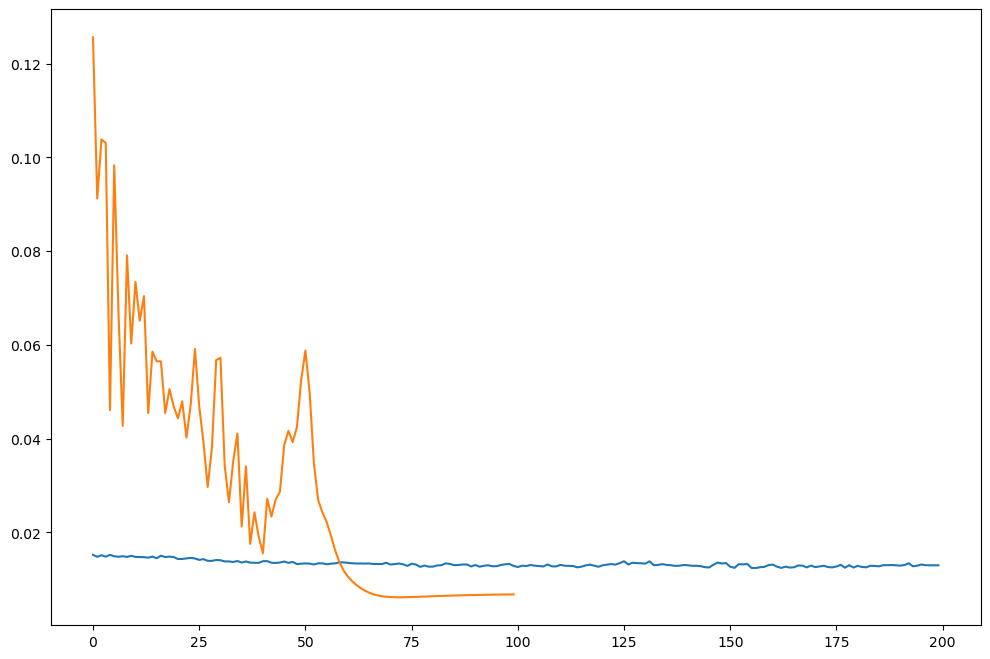

In [10]:
plt.plot(losses_flow_0)
plt.plot(losses_sos_0)

### Y.idx 1

In [ ]:
found min 0.0010918840932231388
sample min 0.0010723259101861338

In [19]:
y_idx = 1

lr = 0.3
num_steps = 200
losses_flow_1, theta_star_flow_1 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, lr, num_steps)


seed=0
N=100 
lmbda=1e-4
eps=1e-6
sig=1e-1
losses_sos_1, theta_star_sos_1 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N, lmbda, eps, sig)

100%|█████████████████████████████████████████| 200/200 [02:03<00:00,  1.62it/s]


flow min 0.006706600158051801


100%|█████████████████████████████████████████| 100/100 [00:22<00:00,  4.48it/s]


found min 0.0014786979842228432
sample min 0.001860817643250079


In [60]:
# y_idx = 1

# # losses_flow_1, theta_star_flow_1 = main_flow(y_idx)


# seed=0
# N=100 
# lmbda=1e-5
# eps=1e-6
# sig=1e-2
# losses_sos_1, theta_star_sos_1 = main_sos(y_idx, seed, N, lmbda, eps, sig)

100%|█████████████████████████████████████████| 100/100 [00:22<00:00,  4.35it/s]

found min 0.00146962071217549
sample min 0.001860817643250079


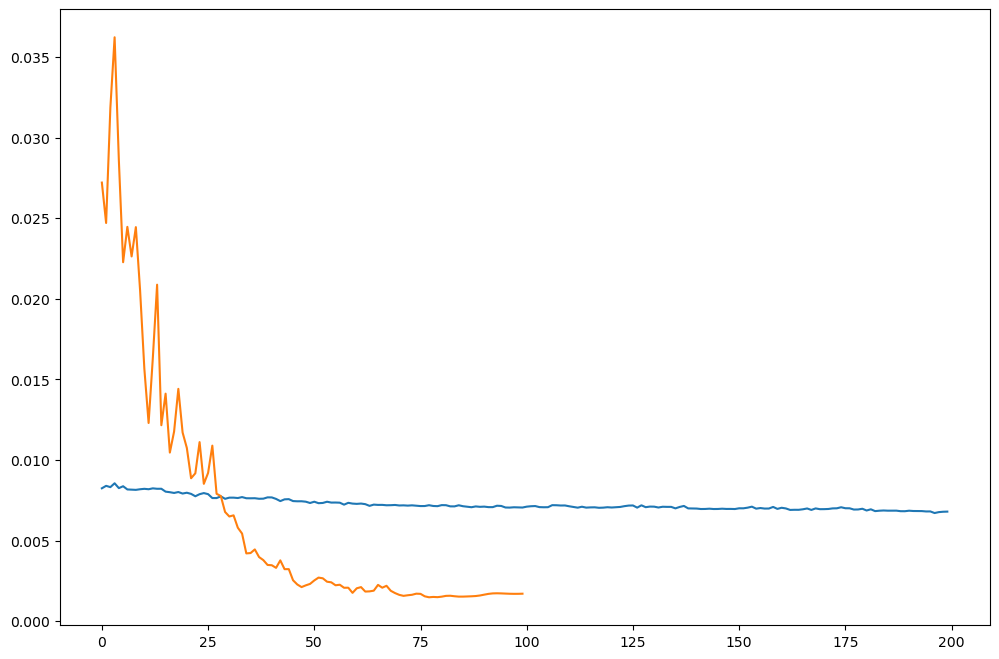

In [20]:
plt.plot(losses_flow_1)
plt.plot(losses_sos_1)

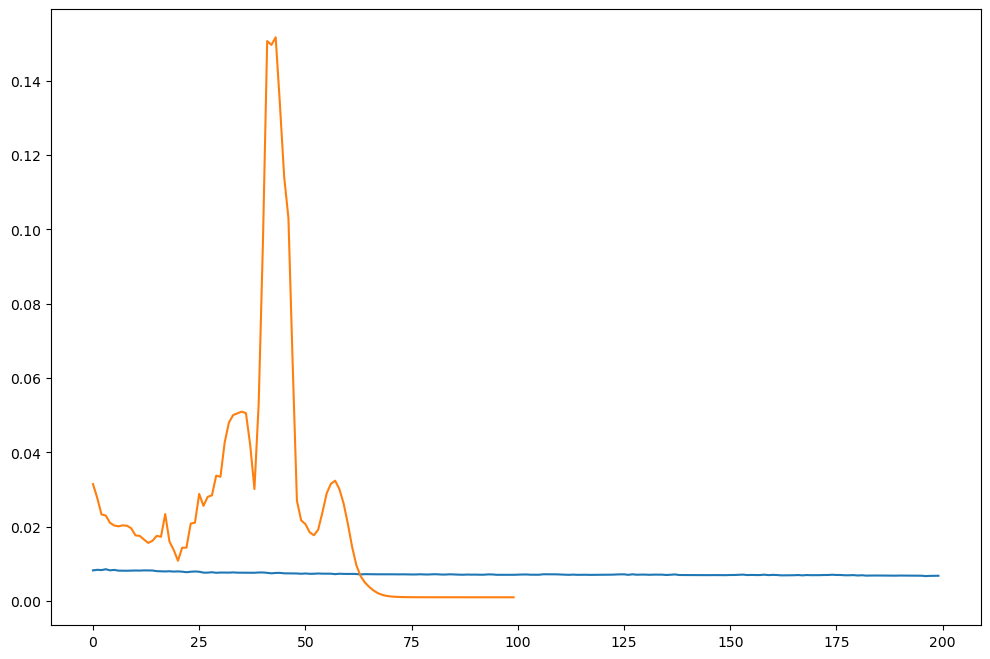

In [45]:
plt.plot(losses_flow_1)
plt.plot(losses_sos_1)

### Assessment

In [43]:
a = 1.4
b = 0.3

x_vec_0_test = jnp.array([0.5, 0.])
# x_vec_0_test = jnp.array([-0.75, -0.3])


traj_test = jnp.array(gen_traj(henon_map(a, b), x_vec_0_test, 1000))

X_test = traj_test[:-1]
Y_test = traj_test[1:]

In [44]:
# thetas_flow = thetajnp.array([theta_star_flow_0, theta_star_flow_1])
# thetas_sos = jnp.array([theta_star_sos_0, theta_star_sos_1])

pred_funcs_flow = get_pred_funcs(thetas_flow[0], ext_kernel, X_train, Y_train)
pred_funcs_sos = get_pred_funcs(thetas_sos[0], ext_kernel, X_train, Y_train)

#### Autoregressive

In [45]:
traj_preds_flow = predict_series(pred_funcs_flow, jnp.array(x_vec_0_test), 1000)
traj_preds_sos = predict_series(pred_funcs_sos, jnp.array(x_vec_0_test), 1000)

100%|███████████████████████████████████████| 1000/1000 [00:42<00:00, 23.80it/s]


In [46]:
np.linalg.norm(traj_test - traj_preds_flow, axis=1)[:10]

array([0.        , 0.03546693, 0.06435805, 0.113728  , 0.23941726,
       0.3589661 , 0.9237001 , 0.35754245, 0.8896387 , 0.69768209])

In [47]:
np.linalg.norm(traj_test - traj_preds_sos, axis=1)[:10]

array([0.        , 0.00061824, 0.00121909, 0.0020691 , 0.00469173,
       0.00549087, 0.01696034, 0.01914274, 0.05028697, 0.09436751])

In [48]:
np.argmin(np.linalg.norm(traj_test - traj_preds_flow, axis=1) < 0.01)

1

In [14]:
print("flow", hausdorff_distance(traj_test, traj_preds_flow))
print("sos", hausdorff_distance(traj_test, traj_preds_sos))

NameError: name 'traj_preds_flow' is not defined

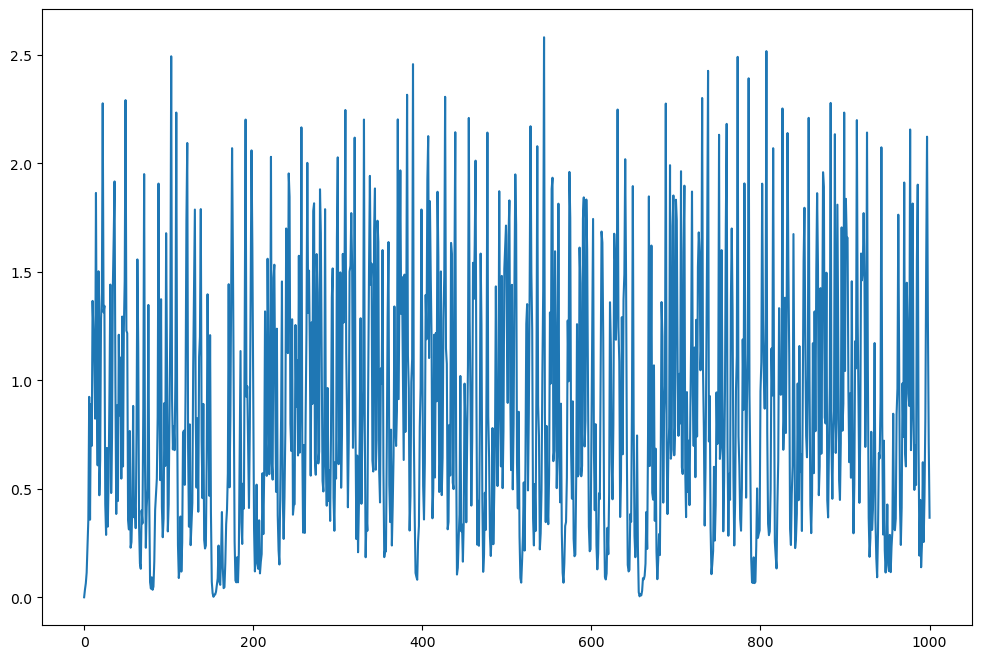

In [50]:
diff = np.linalg.norm((traj_test - traj_preds_flow), axis=1)

plt.plot(diff)
plt.show()

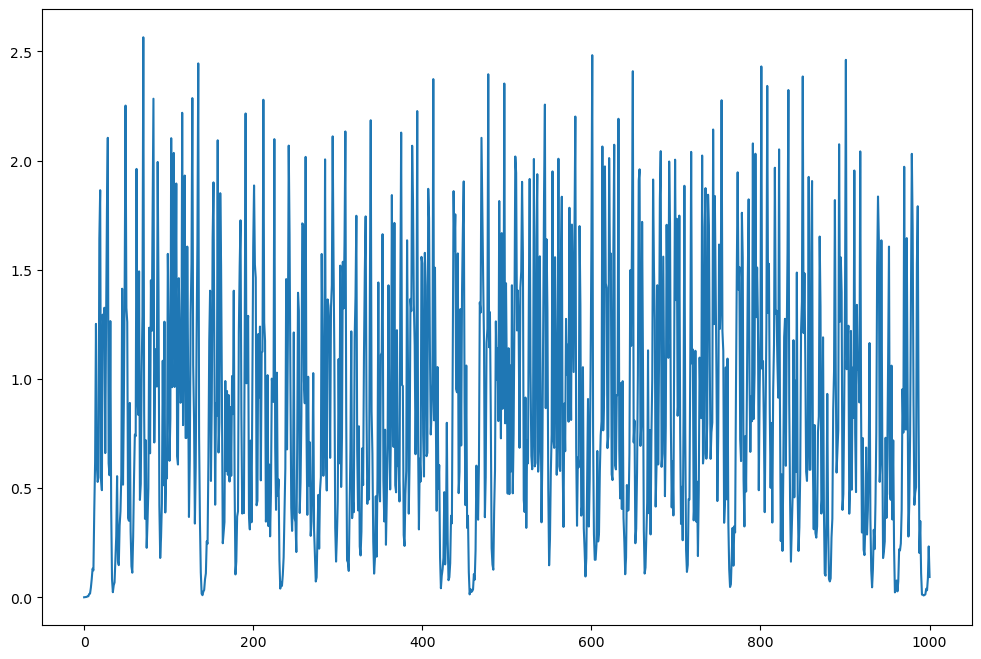

In [67]:
diff = np.linalg.norm((traj_test - traj_preds_sos), axis=1)

plt.plot(diff)
plt.show()

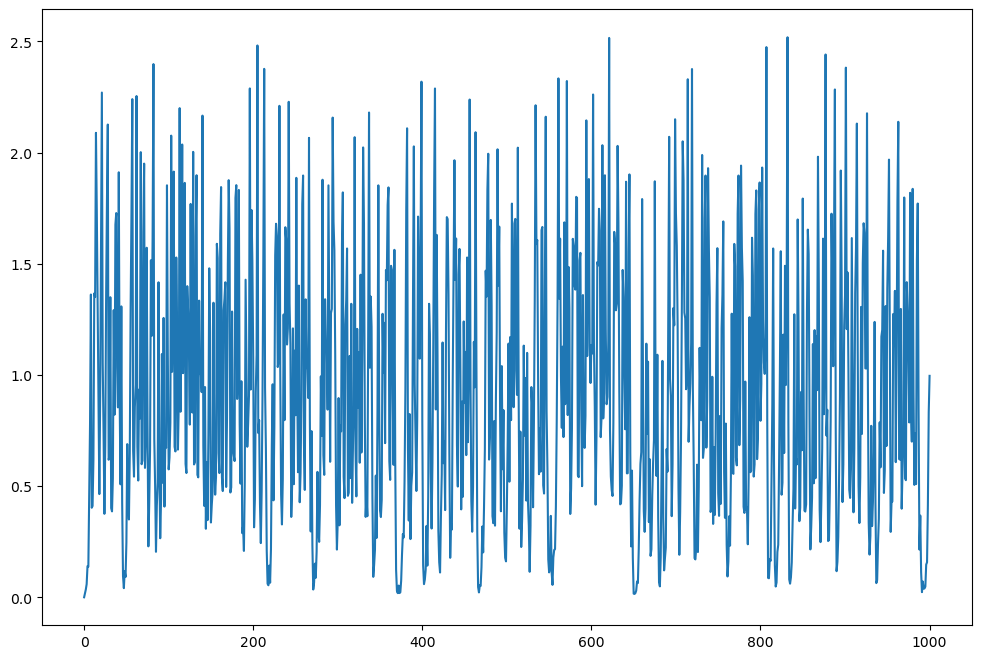

In [68]:
diff = np.linalg.norm((traj_test - traj_preds_flow), axis=1)

plt.plot(diff)
plt.show()

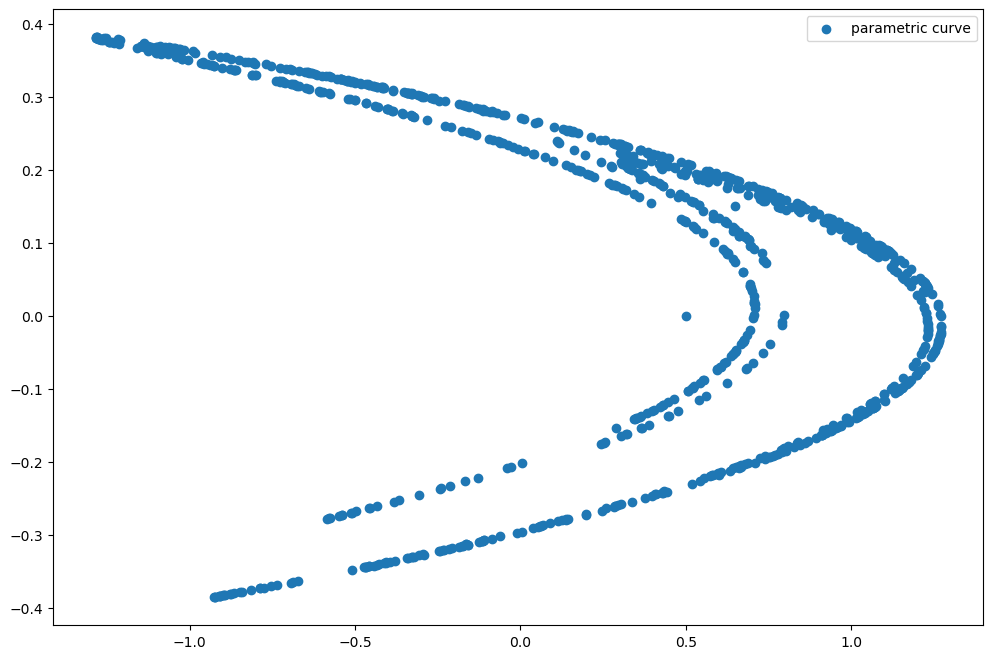

In [69]:

plt.scatter(traj_test[:, 0], traj_test[:, 1],  label='parametric curve')
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


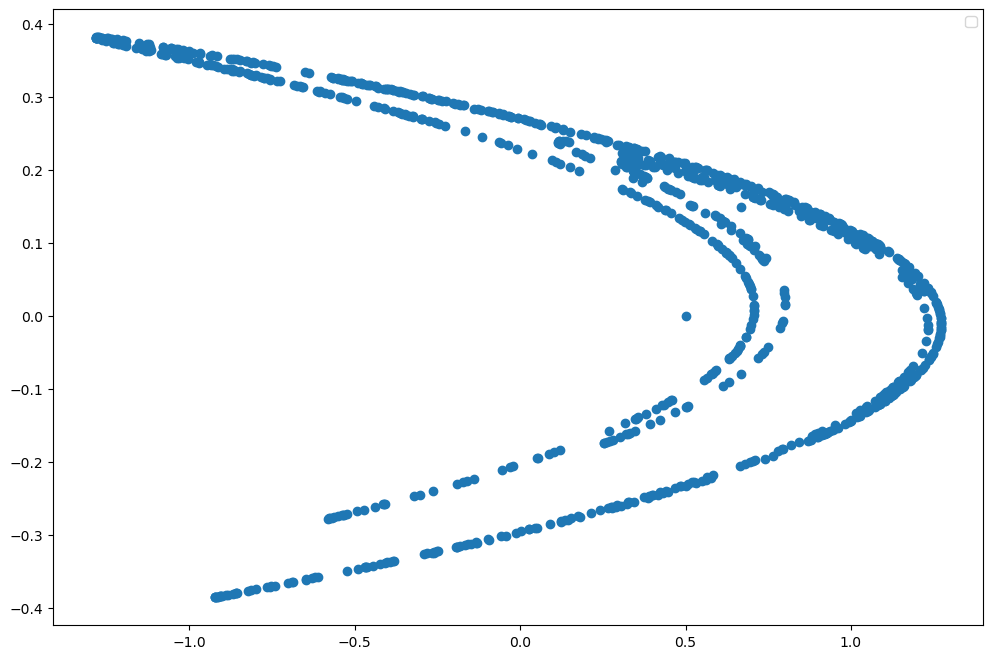

In [70]:
plt.scatter(traj_preds_flow[:, 0], traj_preds_flow[:, 1])
plt.legend()

plt.show()

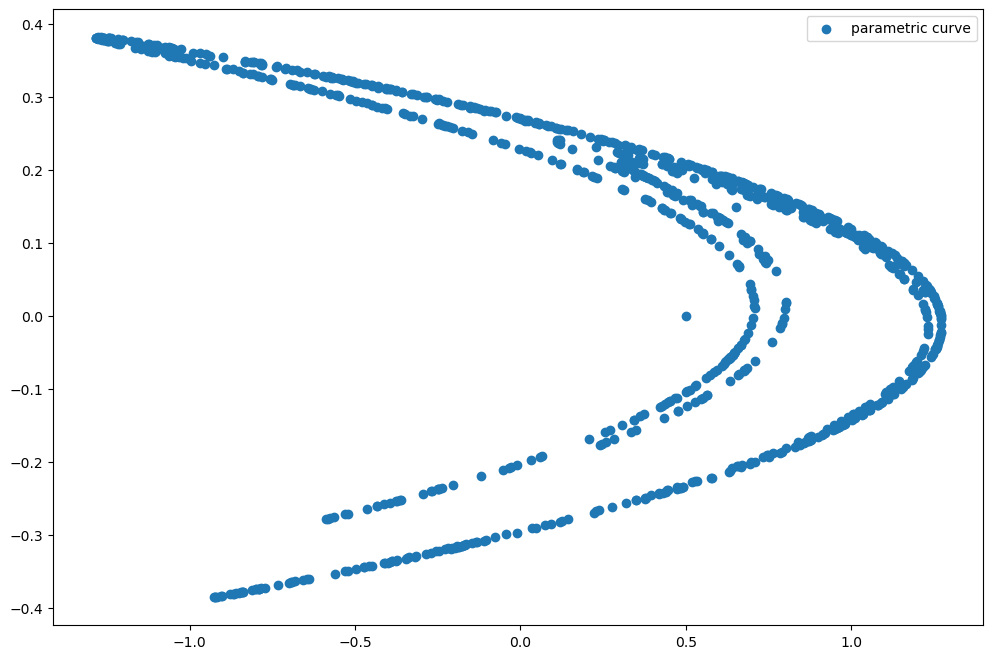

In [71]:
plt.scatter(traj_preds_sos[:, 0], traj_preds_sos[:, 1], label='parametric curve')
plt.legend()

plt.show()